<a href="https://colab.research.google.com/github/Chicken2322/Covid_Italy/blob/master/covid_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing all libraries

import matplotlib.pyplot as plt
from tensorflow.keras.applications import  VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [10]:

# !unzip '/content/drive/My Drive/Assignment/Data.zip' -d '/content/drive/My Drive/Colab Notebooks'

In [13]:
dataset = r'/content/drive/My Drive/Colab Notebooks/Data'

In [14]:
#Set the Epochs and the Batch Size
INIT_LR = 1e-3
EPOCHS=10
BS=3

In [15]:
args={}
args['dataset']=dataset

In [16]:
dataset

'/content/drive/My Drive/Colab Notebooks/Data'

In [17]:
#Set Labels into the images

import numpy as np
from imutils import paths
import cv2
import os

iPaths = list(paths.list_images(args["dataset"]))
data=[]
labels=[]
print(iPaths)

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
  

['/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0251-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0279-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0289-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0253-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0230-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0205-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0235-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0172-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0220-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0249-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0295-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0160-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Normal/IM-0221-0001.jpeg', '/content/drive/My Drive/Colab Notebooks/Data/Norm

In [18]:
data = np.array(data)/255.0
labels=np.array(labels)

In [19]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

In [20]:
import os
Data_Dir = "Data//"

In [21]:
Cimages = os.listdir(dataset+"//Covid")
Nimages = os.listdir(dataset+"//Normal")

In [25]:
import matplotlib.pyplot as plt
import cv2
import skimage

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


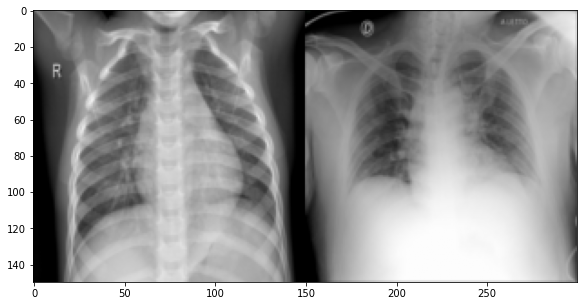

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


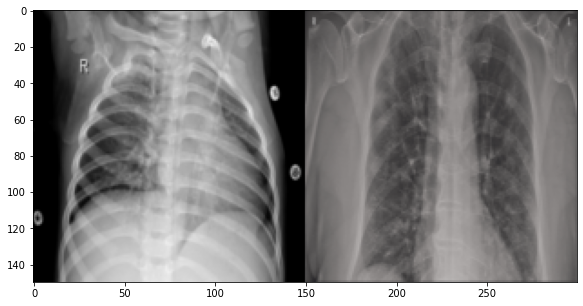

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


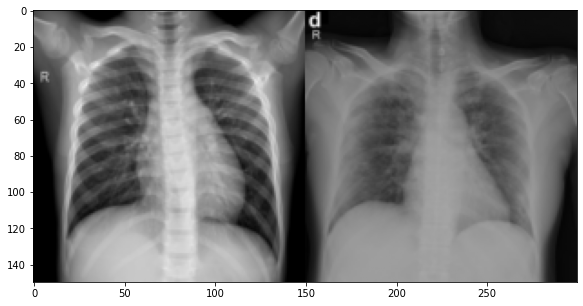

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


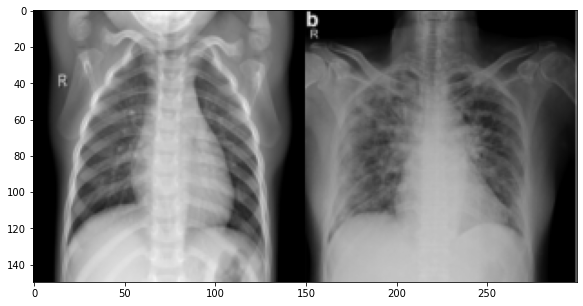

Normal Chest X-ray     Vs      Covid-19 Chest X-ray


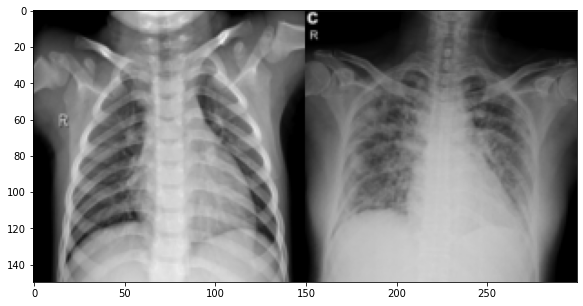

In [26]:
#plotting some of the images

def plotter(i):
    normal = cv2.imread(dataset+"//Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"//Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray     Vs      Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [27]:
 #One Hot Encoding into the Labels

LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [28]:
#Create The VGG Model

bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


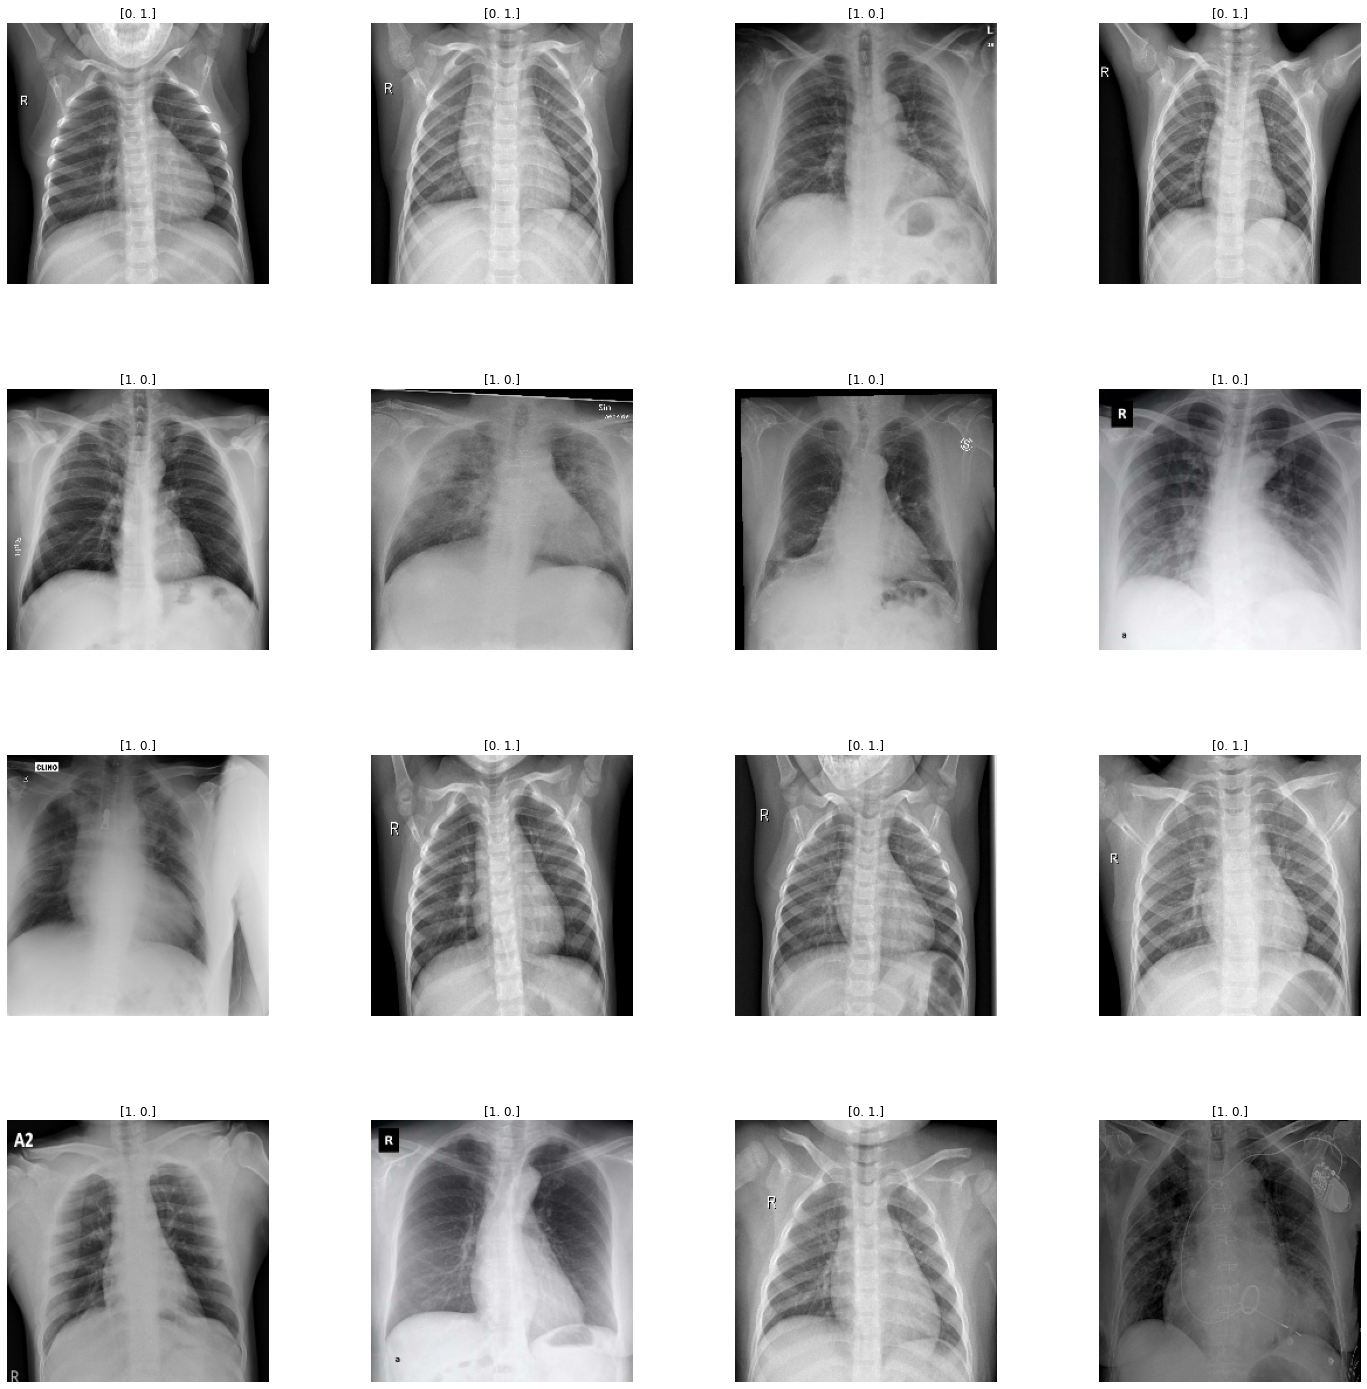

In [29]:
# analyze the training data to clarify what’s in the training data.

W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [40]:
#Train and Compile the model

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Epoch 1/10
53/53 [==============================] - 79s 1s/step - loss: 0.0537 - accuracy: 0.9873
Epoch 2/10
53/53 [==============================] - 79s 1s/step - loss: 0.0453 - accuracy: 0.9873
Epoch 3/10
53/53 [==============================] - 79s 1s/step - loss: 0.0300 - accuracy: 0.9936
Epoch 4/10
53/53 [==============================] - 79s 1s/step - loss: 0.0213 - accuracy: 1.0000
Epoch 5/10
53/53 [==============================] - 79s 1s/step - loss: 0.0414 - accuracy: 0.9745
Epoch 6/10
53/53 [==============================] - 79s 1s/step - loss: 0.0386 - accuracy: 0.9873
Epoch 7/10
53/53 [==============================] - 78s 1s/step - loss: 0.0155 - accuracy: 1.0000
Epoch 8/10
53/53 [==============================] - 78s 1s/step - loss: 0.0184 - accuracy: 0.9936
Epoch 9/10
53/53 [==============================] - 78s 1s/step - loss: 0.0159 - accuracy: 1.0000
Epoch 10/10
53/53 [==============================] - 79s 1s/step - loss: 0.0124 - accuracy: 1.0000


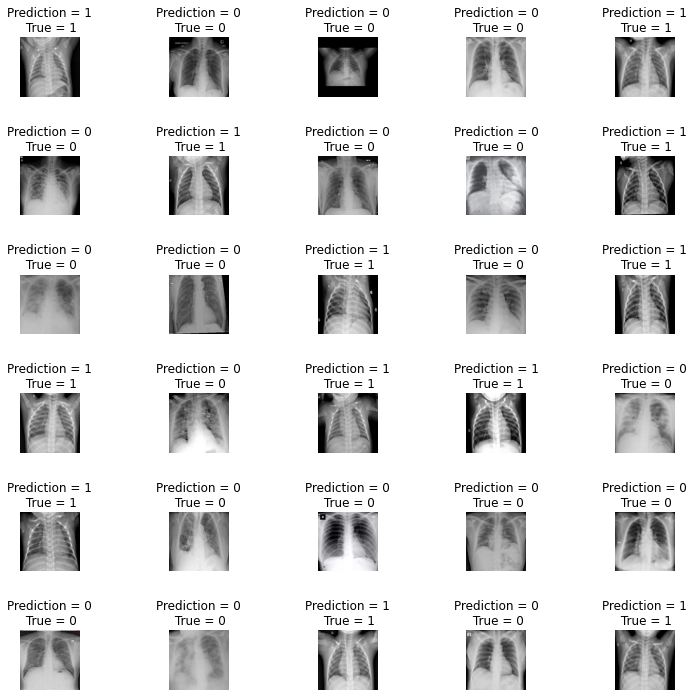

In [31]:
# Predict the test set and compare it with the test data.
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1, hspace=1)

In [33]:
#the classification report and accuracy.

from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [34]:
#Constructing the Confusion Matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  0]
 [ 0 20]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


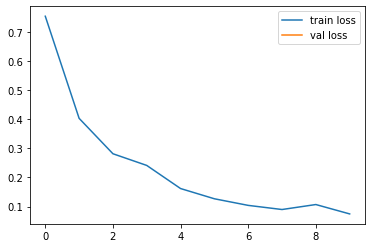

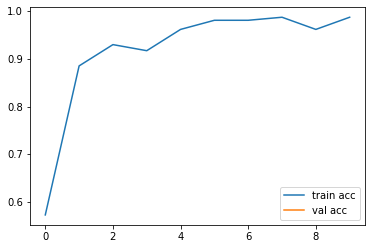

<Figure size 432x288 with 0 Axes>

In [35]:
#Plotting the loss and accuracy

plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Validation_loss')
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Validation_accuracy')

In [38]:
#And finally i saved the model

import tensorflow as tf
from keras.models import load_model
model.save('Covid_model.h5')